In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

income = pd.read_excel(r'income.xlsx')

In [18]:
income.apply(lambda x: np.sum(x.isnull()))
income.fillna(value={'workclass':income.workclass.mode()[0],
                     'occupation':income.occupation.mode()[0],
                     'native-country':income['native-country'].mode()[0]}, inplace=True)
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
income.describe(include =[ 'object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


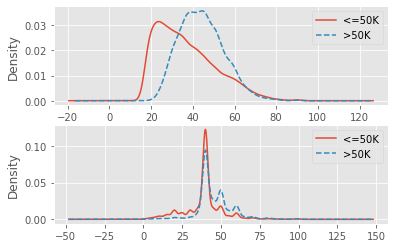

In [25]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1)
# 不同收入水平下的年龄核密度图
income.age[income.income == ' <=50K'].plot(kind = 'kde', label = '<=50K', ax = axes[0], legend = True, linestyle = '-')
income.age[income.income == ' >50K'].plot(kind = 'kde', label = '>50K', ax = axes[0], legend = True, linestyle = '--')
# 不同收入水平下的周工作小时数和密度图
income['hours-per-week'][income.income == ' <=50K'].plot(kind = 'kde', label = '<=50K', ax = axes[1], legend = True, linestyle = '-')
income['hours-per-week'][income.income == ' >50K'].plot(kind = 'kde', label = '>50K', ax = axes[1], legend = True, linestyle = '--')

plt.show()

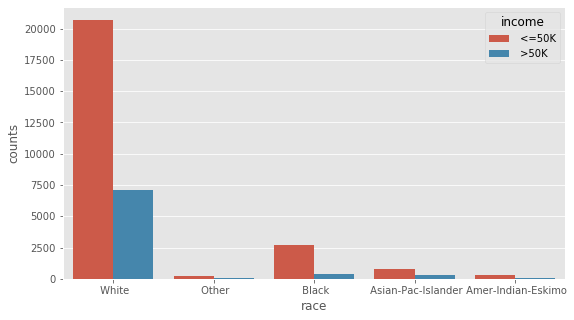

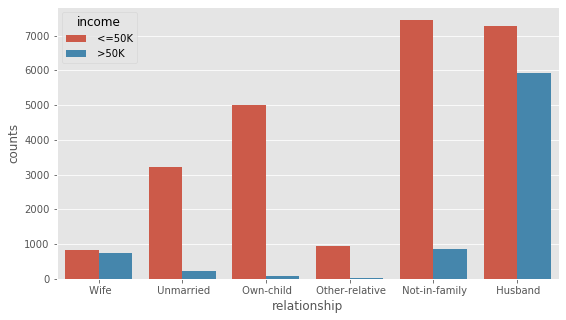

In [43]:
# 不同收入下各种族人数数据
race = pd.DataFrame(income.groupby(by = ['race','income']).aggregate(np.size).loc[:,'age'])
race = race.reset_index()
race.rename(columns={'age':'counts'}, inplace=True)
race.sort_values(by=['race', 'counts'], ascending=False, inplace=True)

# 不同收入下各家庭关系数据
relationship = pd.DataFrame(income.groupby(by = ['relationship','income']).aggregate(np.size).loc[:,'age'])
relationship = relationship.reset_index()
relationship.rename(columns={'age':'counts'}, inplace=True)
relationship.sort_values(by = ['relationship','counts'], ascending=False, inplace=True)

#绘制
plt.figure(figsize=(9,5))
sns.barplot(x='race', y='counts', hue='income', data=race)
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(x="relationship", y="counts", hue = 'income', data=relationship)
plt.show()

In [49]:
# 离散变量重编码
for feature in income.columns:
    if income[feature].dtype == 'object':
        income[feature] = pd.Categorical(income[feature]).codes
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [50]:
# 删除变量
income.drop(['education','fnlwgt'], axis = 1, inplace = True)
income.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [57]:
#拆分数据
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(income.loc[:,'age':'native-country'],
                                                   income['income'], train_size=0.75, random_state=1234)
print('训练集：%d' %X_train.shape[0])
print('测试集：%d' %X_test.shape[0])

训练集：24420
测试集：8141


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
income     0     1
row_0             
0       5637   723
1        589  1192
模型在训练集的准确率0.890500
模型在测试集的准确率0.838840


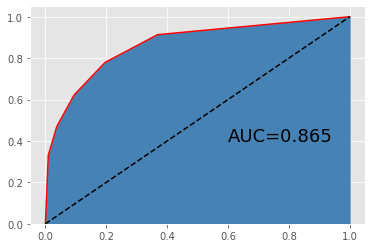

In [66]:
# k邻近模型
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print(kn)

#模型预测
kn_pred = kn.predict(X_test)
print(pd.crosstab(kn_pred, y_test))

#模型得分
print('模型在训练集的准确率%f' %kn.score(X_train, y_train))
print('模型在测试集的准确率%f' %kn.score(X_test, y_test))

#模型评估模块
from sklearn import metrics

#计算ROC曲线的x和y
fpr, tpr, _ = metrics.roc_curve(y_test, kn.predict_proba(X_test)[:,1])
#绘制ROC曲线
plt.plot(fpr, tpr, linestyle='solid', color='red')
#阴影
plt.stackplot(fpr, tpr, color='steelblue')
#参考线
plt.plot([0,1], [0,1], linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' %metrics.auc(fpr,tpr), fontdict=dict(size=18))
plt.show()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
income     0     1
row_0             
0       5862   784
1        364  1131
模型在训练集的准确率0.869451
模型在测试集的准确率0.858985


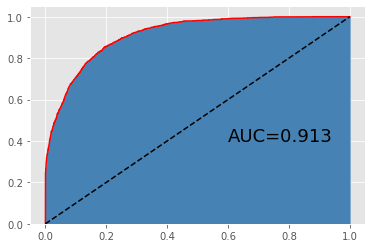

In [72]:
# GBDT模型
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)
print(gbdt)

#预测
gbdt_pred = gbdt.predict(X_test)
print(pd.crosstab(gbdt_pred, y_test))

#模型得分
print('模型在训练集的准确率%f' %gbdt.score(X_train, y_train))
print('模型在测试集的准确率%f' %gbdt.score(X_test, y_test))

#绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(y_test, gbdt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle='solid', color='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1], [0,1], linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' %metrics.auc(fpr, tpr), fontdict=dict(size=18))
plt.show()

In [76]:
# k邻近网格搜索模型
from sklearn.model_selection import GridSearchCV
#设置参数
k_options = list(range(1,12))
parameters = {'n_neighbors':k_options}
#搜索不同的K值
grid_kn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters,
                      cv=10, scoring='accuracy', verbose=0, n_jobs=2)
grid_kn.fit(X_train, y_train)
print(grid_kn)
#输出结果
grid_kn.cv_results_, grid_kn.best_params_, grid_kn.best_score_

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)


({'mean_fit_time': array([1.48584578, 1.17842236, 1.1807209 , 1.15713444, 1.18082125,
         1.2117034 , 1.32273889, 1.16542919, 1.18172052, 1.30824726,
         1.15254009]),
  'std_fit_time': array([0.20644435, 0.03503212, 0.03288822, 0.02742712, 0.03361231,
         0.07664934, 0.16168105, 0.04777401, 0.0727319 , 0.09240264,
         0.04254922]),
  'mean_score_time': array([0.53159387, 0.60175333, 0.61064866, 0.61374619, 0.63723311,
         0.69130261, 0.76486008, 0.66441813, 0.70379493, 0.78204973,
         0.67101364]),
  'std_score_time': array([0.04038049, 0.0510987 , 0.02682435, 0.02140039, 0.02928583,
         0.06704773, 0.12506542, 0.04411578, 0.0471017 , 0.0710744 ,
         0.07806898]),
  'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_neighbors': 1},
 

income     0     1
row_0             
0       5834   867
1        392  1048
模型在训练集的准确率0.882473
模型在测试集的准确率0.845351


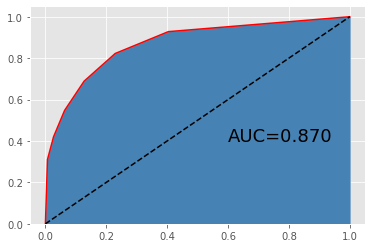

In [80]:
# k邻近网格搜索模型预测评分
grid_kn_pred = grid_kn.predict(X_test)
print(pd.crosstab(grid_kn_pred, y_test))

#模型得分
print('模型在训练集的准确率%f' %grid_kn.score(X_train, y_train))
print('模型在测试集的准确率%f' %grid_kn.score(X_test, y_test))

#绘制ROC
fpr, tpr, _ = metrics.roc_curve(y_test, grid_kn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle='solid', color='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1], [0,1], linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' %metrics.auc(fpr, tpr), fontdict=dict(size=18))
plt.show()

In [82]:
# GBDT网格搜索模型
learning_rate_options = [0.01, 0.05, 0.1]
max_depth_options = [3, 5, 7, 9]
n_estimators_options = [100, 300, 500]
parameters = {'learning_rate':learning_rate_options,
              'max_depth':max_depth_options,
              'n_estimators':n_estimators_options}
grid_gbdt = 
(estimator=GradientBoostingClassifier(),param_grid=parameters,
                        cv=10, scoring='accuracy', n_jobs=4)
grid_gbdt.fit(X_train, y_train)
#输出结果
grid_gbdt.cv_results_, grid_gbdt.best_params_, grid_gbdt.best_score_

({'mean_fit_time': array([ 3.78312473, 11.40444436, 19.41423993,  6.13907061, 18.9589015 ,
         33.00183091,  9.54181557, 27.10411904, 46.10160079, 12.24535968,
         38.96400251, 66.10870008,  3.76133728, 11.50858507, 19.247137  ,
          6.23871379, 18.63259013, 32.96035452,  9.41019013, 27.08932862,
         44.74637861, 12.92457039, 38.97569542, 65.08409019,  3.6977731 ,
         11.25323067, 18.68835816,  6.06701152, 18.43080561, 30.74652686,
          9.09577127, 27.44972086, 45.25978436, 13.1232564 , 40.15791609,
         65.67984605]),
  'std_fit_time': array([0.06271034, 0.184606  , 0.22450214, 0.11559602, 0.09406616,
         1.82630296, 1.17117846, 0.18053675, 0.19487595, 0.19569383,
         0.27370033, 1.25408229, 0.03389843, 0.22149443, 0.12306503,
         0.0879626 , 0.18987212, 1.59132107, 0.47122447, 0.2814348 ,
         0.16724886, 0.08857289, 0.61775167, 0.83448868, 0.05664057,
         0.20531563, 0.13745012, 0.03315552, 0.21789455, 0.20832219,
         0.

income     0     1
row_0             
0       5833   655
1        393  1260
模型在训练集的准确率0.897379
模型在测试集的准确率0.871269


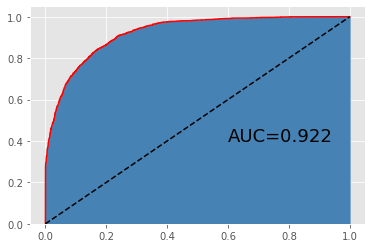

In [85]:
# GBDT网格搜索模型预测评分
grid_gbdt_pred = grid_gbdt.predict(X_test)
print(pd.crosstab(grid_gbdt_pred, y_test))

#模型得分
print('模型在训练集的准确率%f' %grid_gbdt.score(X_train, y_train))
print('模型在测试集的准确率%f' %grid_gbdt.score(X_test, y_test))

#绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(y_test, grid_gbdt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle='solid', color='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1], [0,1], linestyle='dashed', color='black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()